In [30]:
from keras.layers import Conv2D, MaxPool2D
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 0s 93ms/step


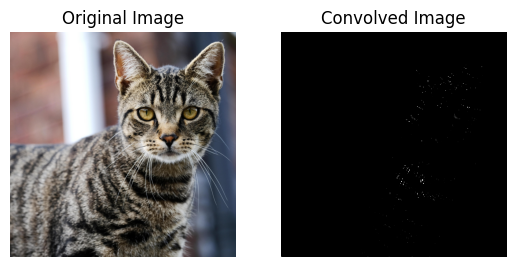

In [44]:
# Read the image using OpenCV
img = cv2.imread("./Cat.jpg")

# Check if the image is loaded successfully
if img is not None:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to (224, 224)
    image_resized = cv2.resize(image_rgb, (256, 256))

    # Convert the resized image to array
    image_array = img_to_array(image_resized)

    # Normalize the image array
    image_normalized = image_array / 255.0

    # Reshape the image to match the expected input shape of the model
    image_reshaped = np.expand_dims(image_normalized, axis=0)

    # Define a simple Keras Sequential model with one Conv2D layer
    model = Sequential()
    model.add(Conv2D(filters=36, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)))
    # model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(224, 224, 3)))

    # Apply the model to the input image
    convolved_image = model.predict(image_reshaped)

    # Reshape back to (height, width, channels)
    convolved_image = np.squeeze(convolved_image, axis=0)

    # Display the original and convolved images using Matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(convolved_image[:, :, 0], cmap='gray')
    plt.title('Convolved Image')
    plt.axis('off')

    plt.show()
else:
    print('Error: Unable to load the image.')